In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
data=pd.read_csv("housing.csv")#read the data

In [177]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [178]:
data.info()#to get the information of the data and see if null values are present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [179]:
data.dropna(inplace=True)#drop the missing values

In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [181]:
from sklearn.model_selection import train_test_split

x=data.drop(['median_house_value'],axis=1)#drop the target variable
y=data['median_house_value']#target variable

In [182]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [183]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [184]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)#split the data into training and testing data, 0.2 tells 20% of data is reserved for testing

In [185]:
train_data=x_train.join(y_train)#join the training data

In [186]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14119,-117.09,32.75,30.0,1899.0,546.0,1620.0,493.0,1.6034,NEAR OCEAN,84400.0
3988,-118.65,34.18,27.0,1793.0,339.0,1016.0,326.0,4.9250,<1H OCEAN,240300.0
10128,-117.90,33.93,12.0,4325.0,1191.0,1897.0,1080.0,3.3173,<1H OCEAN,247400.0
5556,-118.41,33.96,32.0,1044.0,219.0,567.0,222.0,4.1471,<1H OCEAN,284400.0
6426,-117.99,34.13,37.0,1568.0,371.0,1618.0,350.0,2.9605,INLAND,129400.0
...,...,...,...,...,...,...,...,...,...,...
14873,-117.09,32.62,37.0,1925.0,428.0,1344.0,426.0,2.4866,NEAR OCEAN,129700.0
15465,-117.22,33.18,13.0,4273.0,886.0,2328.0,801.0,3.3444,<1H OCEAN,183900.0
1201,-121.70,39.36,37.0,2330.0,495.0,1505.0,470.0,2.0474,INLAND,56000.0
15996,-122.46,37.75,52.0,1207.0,152.0,465.0,162.0,10.7569,NEAR BAY,500001.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

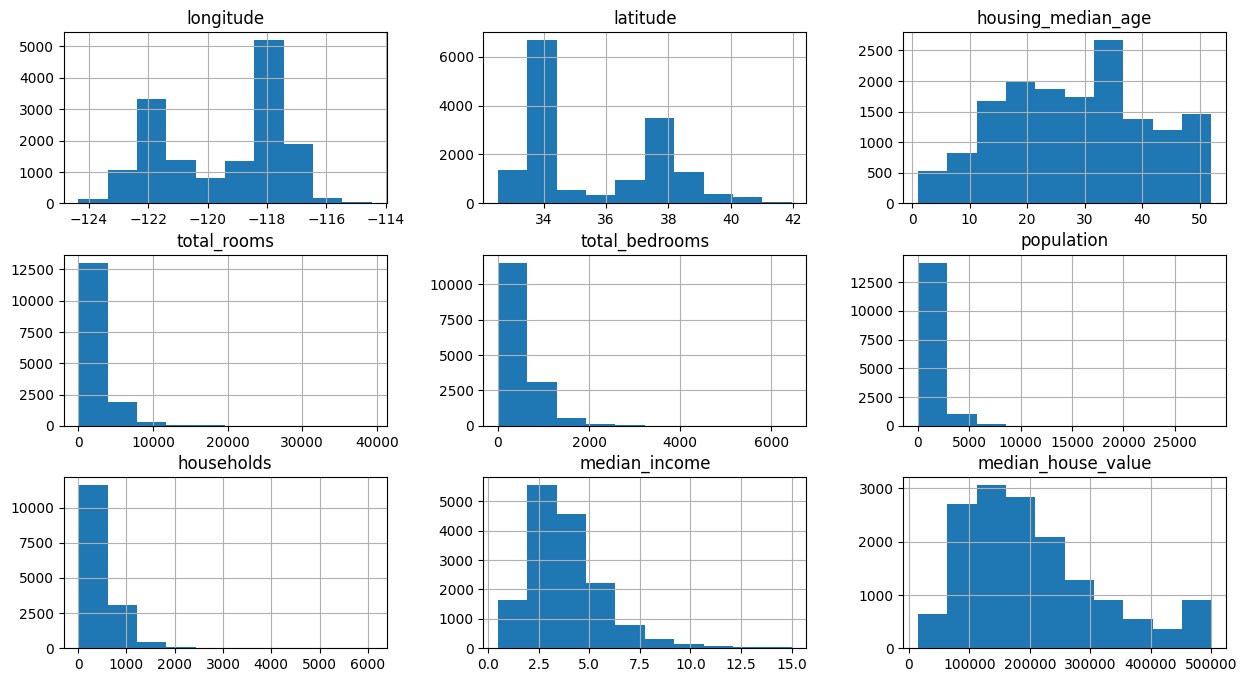

In [187]:
train_data.hist(figsize=(15,8))

In [188]:
train_data.select_dtypes(include=[np.number]).corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924735,-0.111163,0.042151,0.065384,0.095797,0.053319,-0.013137,-0.044167
latitude,-0.924735,1.000000,0.015577,-0.035821,-0.065551,-0.107351,-0.070320,-0.081024,-0.145673
housing_median_age,-0.111163,0.015577,1.000000,-0.362411,-0.324332,-0.300246,-0.306180,-0.120214,0.102960
total_rooms,0.042151,-0.035821,-0.362411,1.000000,0.931113,0.867328,0.922093,0.207868,0.137472
total_bedrooms,0.065384,-0.065551,-0.324332,0.931113,1.000000,0.888272,0.981627,0.001793,0.054189
population,0.095797,-0.107351,-0.300246,0.867328,0.888272,1.000000,0.915421,0.014985,-0.019228
households,0.053319,-0.070320,-0.306180,0.922093,0.981627,0.915421,1.000000,0.022028,0.067965
median_income,-0.013137,-0.081024,-0.120214,0.207868,0.001793,0.014985,0.022028,1.000000,0.687573
median_house_value,-0.044167,-0.145673,0.102960,0.137472,0.054189,-0.019228,0.067965,0.687573,1.000000


<Axes: >

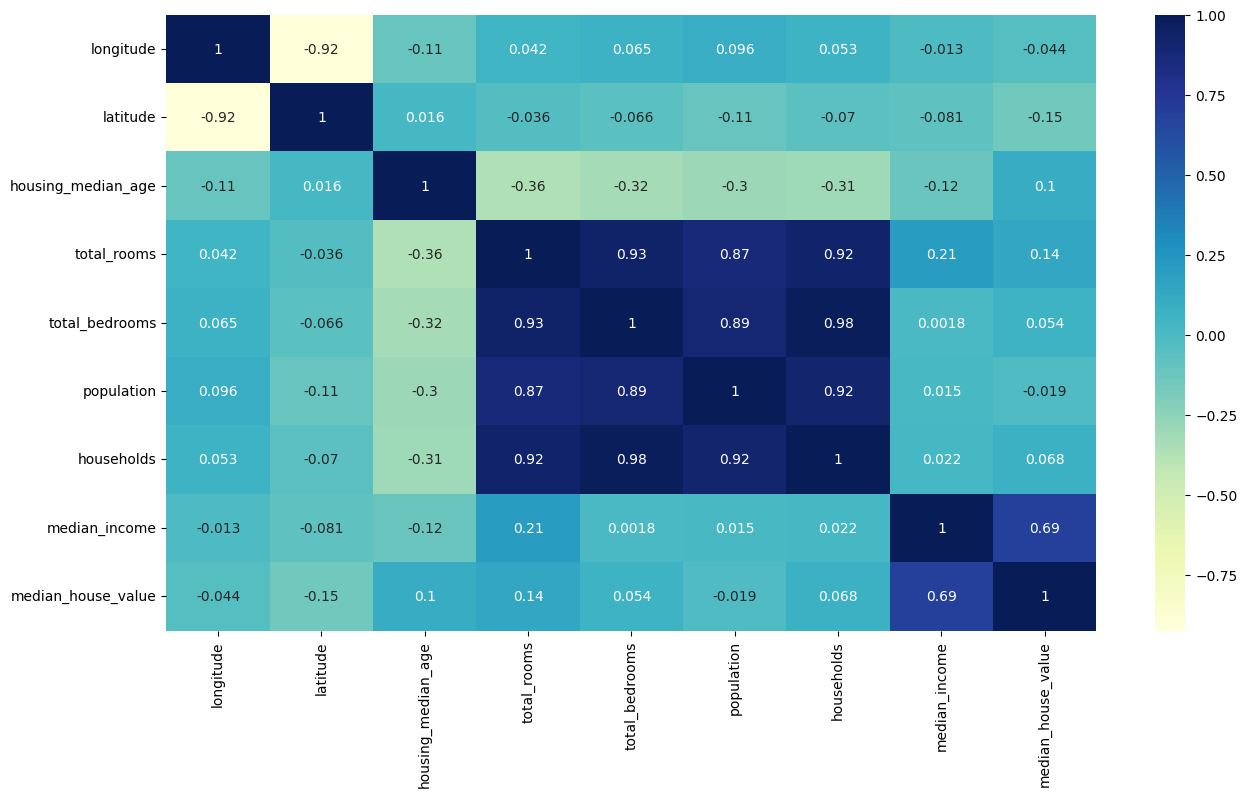

In [189]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.select_dtypes(include=[np.number]).corr(),annot=True,cmap="YlGnBu")

In [190]:
train_data['total_rooms'] = np.log(train_data['total_rooms']) + 1

In [191]:
train_data['total_rooms'] = np.log(train_data['total_rooms']) + 1
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']) + 1
train_data['population'] = np.log(train_data['population']) + 1
train_data['households'] = np.log(train_data['households']) + 1

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

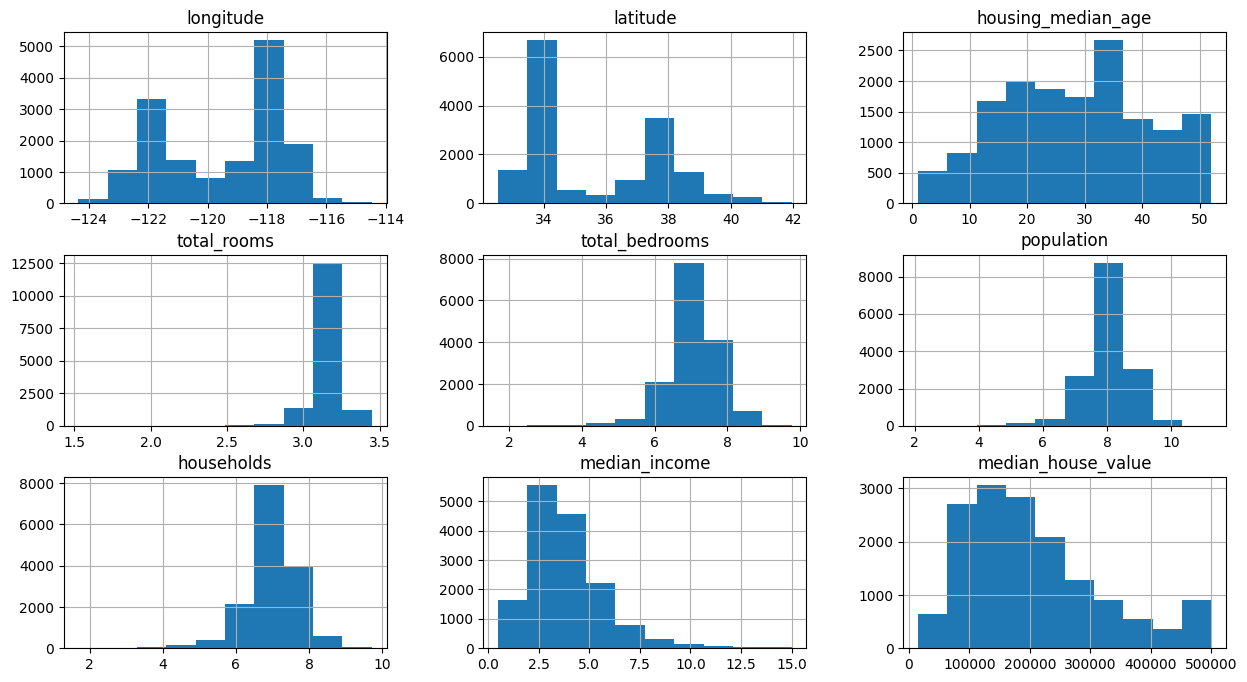

In [192]:
train_data.hist(figsize=(15,8))

In [193]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     6754
INLAND        4924
NEAR OCEAN    1963
NEAR BAY      1680
ISLAND           3
Name: count, dtype: int64

In [194]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity,dtype=int)).drop('ocean_proximity',axis=1)

In [195]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14119,-117.09,32.75,30.0,3.145824,7.302619,8.390181,7.200509,1.6034,84400.0,0,0,0,0,1
3988,-118.65,34.18,27.0,3.139083,6.826000,7.923629,6.786897,4.9250,240300.0,1,0,0,0,0
10128,-117.90,33.93,12.0,3.237744,8.082549,8.548029,7.984716,3.3173,247400.0,1,0,0,0,0
5556,-118.41,33.96,32.0,3.073274,6.389072,7.340359,6.402677,4.1471,284400.0,1,0,0,0,0
6426,-117.99,34.13,37.0,3.123166,6.916202,8.388946,6.857933,2.9605,129400.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14873,-117.09,32.62,37.0,3.147413,7.059123,8.203406,7.054439,2.4866,129700.0,0,0,0,0,1
15465,-117.22,33.18,13.0,3.236453,7.786717,8.752765,7.685861,3.3444,183900.0,1,0,0,0,0
1201,-121.70,39.36,37.0,3.169468,7.204558,8.316548,7.152733,2.0474,56000.0,0,1,0,0,0
15996,-122.46,37.75,52.0,3.091357,6.023881,7.142037,6.087596,10.7569,500001.0,0,0,0,1,0


<Axes: xlabel='longitude', ylabel='latitude'>

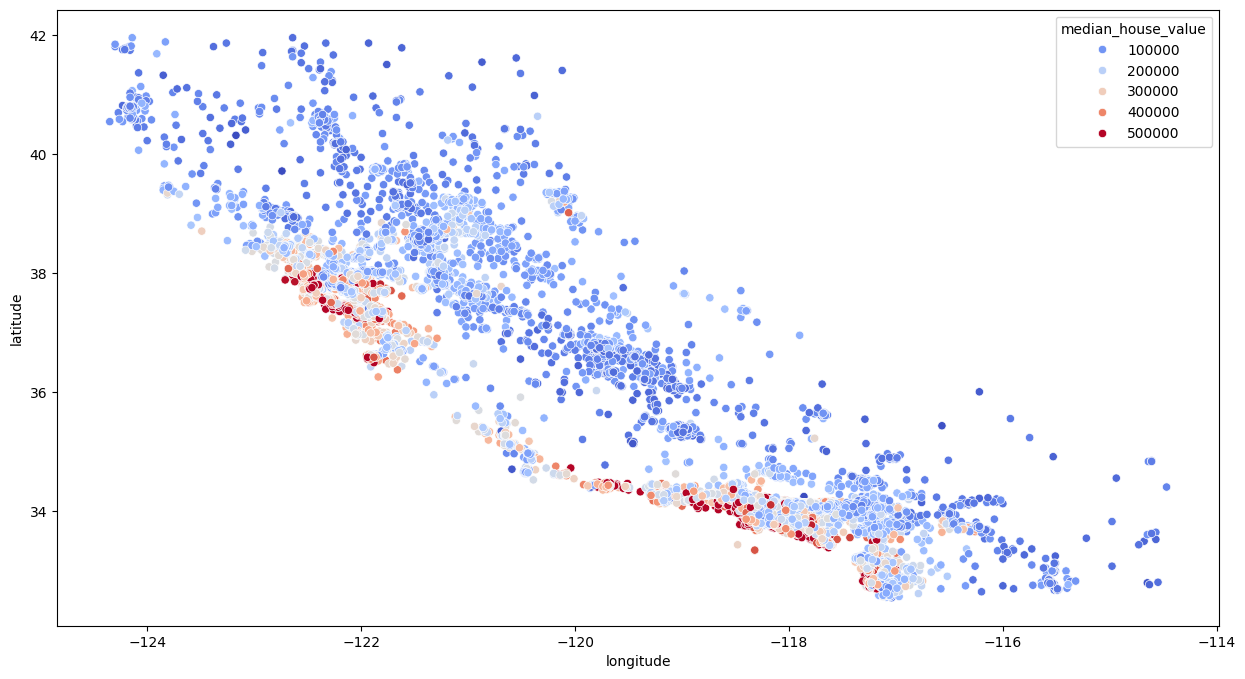

In [196]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='longitude',y='latitude',data=train_data,hue='median_house_value',palette='coolwarm')

In [197]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

<Axes: >

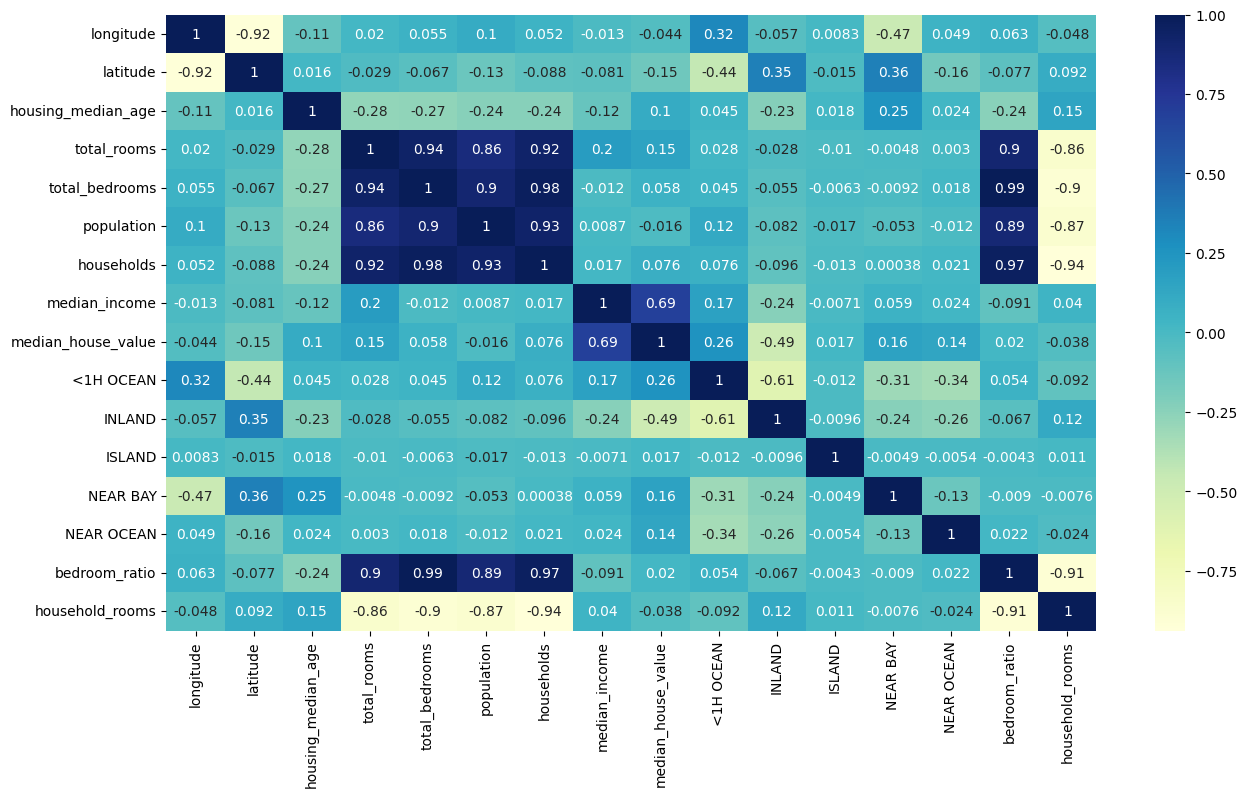

In [198]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')

In [199]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train,y_train = train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
x_train_s=scaler.fit_transform(x_train)
reg=LinearRegression()
reg.fit(x_train_s,y_train)

LinearRegression()

In [200]:
test_data =x_test.join(y_test) 

test_data['total_rooms'] = np.log(test_data['total_rooms']) + 1
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']) + 1
test_data['population'] = np.log(test_data['population']) + 1
test_data['households'] = np.log(test_data['households']) + 1

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity,dtype=int)).drop('ocean_proximity',axis=1)

test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']


In [201]:
x_test,y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [202]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
14119,-117.09,32.75,30.0,3.145824,7.302619,8.390181,7.200509,1.6034,0,0,0,0,1,2.321369,0.436889
3988,-118.65,34.18,27.0,3.139083,6.826000,7.923629,6.786897,4.9250,1,0,0,0,0,2.174521,0.462521
10128,-117.90,33.93,12.0,3.237744,8.082549,8.548029,7.984716,3.3173,1,0,0,0,0,2.496352,0.405493
5556,-118.41,33.96,32.0,3.073274,6.389072,7.340359,6.402677,4.1471,1,0,0,0,0,2.078914,0.479998
6426,-117.99,34.13,37.0,3.123166,6.916202,8.388946,6.857933,2.9605,0,1,0,0,0,2.214484,0.455409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14873,-117.09,32.62,37.0,3.147413,7.059123,8.203406,7.054439,2.4866,0,0,0,0,1,2.242833,0.446161
15465,-117.22,33.18,13.0,3.236453,7.786717,8.752765,7.685861,3.3444,1,0,0,0,0,2.405942,0.421092
1201,-121.70,39.36,37.0,3.169468,7.204558,8.316548,7.152733,2.0474,0,1,0,0,0,2.273113,0.443113
15996,-122.46,37.75,52.0,3.091357,6.023881,7.142037,6.087596,10.7569,0,0,0,1,0,1.948620,0.507812


In [203]:
x_test_s=scaler.transform(x_test)

In [204]:
reg.score(x_test,y_test)

c:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


-2186.033454799714

In [205]:
from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor()

forest.fit(x_train_s,y_train)

RandomForestRegressor()

In [206]:
forest.score(x_test,y_test)

c:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


-2.6582441692718355

In [207]:
from sklearn.model_selection import GridSearchCV
forest=RandomForestRegressor()
param_grid={
    "n_estimators":[100,200,300],
    "max_features":[2,4],
    "max_depth": [None,4,8]
}

grid_search=GridSearchCV(forest,param_grid,cv=5,scoring = 'neg_mean_squared_error',return_train_score=True)
grid_search.fit(x_train_s,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'max_features': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [208]:
best_forest=grid_search.best_estimator_

In [209]:
best_forest.score(x_test_s,y_test)

0.5333616891014488